<a href="https://colab.research.google.com/github/MLBartkowiakChojnacki/ML_PROJECT_2022/blob/DIMENSIONALITY_REDUCTION/notebooks/ML_PROJECT_2022_DIM_RED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FEATURE SELECTION TRAINING

##ANOVA F-test Feature Selection
The scikit-learn machine library provides an implementation of the ANOVA F-test in the function


```
f classif()
```

 

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
# load the dataset
def load_dataset(filename):
  # load the dataset
  data = pd.read_csv(filename, header=None)
  # retrieve array
  dataset = data.values
  # split into input and output variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  return X, y

X, y = load_dataset('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv')

In [30]:
X.shape

(768, 8)

In [31]:
y.shape

(768,)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Feature 0: 16.527385
Feature 1: 131.325562
Feature 2: 0.042371
Feature 3: 1.415216
Feature 4: 12.778966
Feature 5: 49.209523
Feature 6: 13.377142
Feature 7: 25.126440


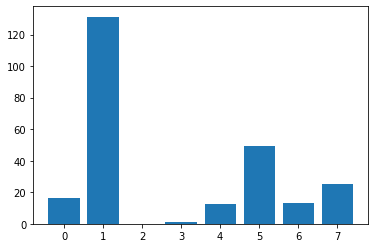

In [36]:
# example of anova f-test feature selection for numerical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
# load the dataset
def load_dataset(filename):
  # load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  return X, y

# feature selection
def select_features(X_train, y_train, X_test):
  # configure to select all features
  fs = SelectKBest(score_func=f_classif, k='all')
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
# load the dataset
X, y = load_dataset('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

##Mutual Information Feature Selection
The scikit-learn machine learning library provides
an implementation of mutual information for feature selection with numeric input and categorical
output variables via the function 
`mutual_info_classif()`
. 
Like 
`f_classif()`
it can be used
in the SelectKBest feature selection strategy (and other strategies).

Feature 0: 0.024239
Feature 1: 0.102582
Feature 2: 0.030731
Feature 3: 0.006934
Feature 4: 0.053357
Feature 5: 0.076066
Feature 6: 0.017017
Feature 7: 0.040614


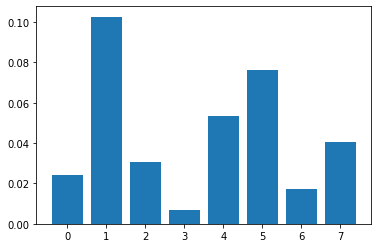

In [42]:
# example of mutual information feature selection for numerical input data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
# load the dataset
def load_dataset(filename):
# load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  return X, y
# feature selection
def select_features(X_train, y_train, X_test):
  # configure to select all features
  fs = SelectKBest(score_func=mutual_info_classif, k='all')
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
# load the dataset
X, y = load_dataset('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

##Modeling with selected features

###Model built using all features
First we create base line with all features and then compare with model based
on features selected with ANOVA and mutual information.

In [45]:
# evaluation of a model using all input features
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# load the dataset
def load_dataset(filename):
  # load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  return X, y
# load the dataset
X, y = load_dataset('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.56


###Model Built Using ANOVA F-test Features

In [57]:
# evaluation of a model using 4 features chosen with anova f-test
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# load the dataset
def load_dataset(filename):
  # load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  return X, y

# feature selection
def select_features(X_train, y_train, X_test):
  # configure to select a subset of features
  fs = SelectKBest(score_func=f_classif, k=4)
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
# load the dataset
X, y = load_dataset('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 78.74


###Model Built Using Mutual Information Features

In [69]:
# evaluation of a model using 4 features chosen with mutual information
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# load the dataset
def load_dataset(filename):
  # load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  return X, y
# feature selection
def select_features(X_train, y_train, X_test):
  # configure to select a subset of features
  fs = SelectKBest(score_func=mutual_info_classif, k=4)
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
# load the dataset
X, y = load_dataset('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.17


#DIMENSIONALITY REDUCTION TRAINING
https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/



In [1]:
# synthetic classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [3]:
X

array([[ 0.08054814,  0.82273313, -1.21175254, ...,  2.88260938,
         1.79160028, -4.29708787],
       [-2.3302999 , -4.86608574, -3.88291317, ..., -0.14561581,
        -0.55489384,  0.61420772],
       [-1.19714954,  1.5556314 , -0.61871573, ...,  1.73481788,
         0.13067403, -3.13351468],
       ...,
       [ 0.61415067, -3.04457734, -3.15540898, ..., -0.3321506 ,
        -2.76644911,  0.81460546],
       [ 3.34221924, -1.33613258, -0.34013763, ..., -3.95225071,
         1.33439536, -0.69139029],
       [-1.49207892,  2.75225738, -1.22655776, ..., -3.10146388,
         2.34534351, -1.32021006]])

In [4]:
y

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [5]:
# evaluate logistic regression model on raw data
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the model
model = LogisticRegression()
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.824 (0.034)


##PCA

In [7]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.824 (0.034)


##SVD

In [8]:
# evaluate svd with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('svd', TruncatedSVD(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.824 (0.034)


##LDA
The number of dimensions for the projection is limited to 1 and C-1, where C is the number of classes. In this case, our dataset is a binary classification problem (two classes), limiting the number of dimensions to 1.

In [9]:
# evaluate lda with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.825 (0.034)


##Isomap Embedding

In [10]:
# evaluate isomap with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.manifold import Isomap
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('iso', Isomap(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.888 (0.029)


##Locally Linear Embedding

In [11]:
# evaluate lle and logistic regression for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.886 (0.028)


##Modified Locally Linear Embedding

Embedding that can be used as a dimensionality reduction data transform. The “method” argument must be set to ‘modified’ and the “n_components” argument can be set to configure the number of desired dimensions in the output of the transform which must be less than the “n_neighbors” argument.

In [12]:
# evaluate modified lle and logistic regression for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=7)
# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=5, method='modified', n_neighbors=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.848 (0.037)


#DIMENSIONALITY REDUCTION AND HYPERPARAMETERS
https://towardsdatascience.com/shap-for-feature-selection-and-hyperparameter-tuning-a330ec0ea104
